# Leer y escribir archivos, bases de datos y más

Al realizar una exploración de datos, estos pueden provenir de muchas fuentes, en algunos casos recursos en linea, bases de datos SQL o de otros tipos; en otros puede ser necesario exportar a algún formato para seguir el análisis en otra herramienta. Con las herramientas que ya conocemos (Python, Pandas, etc), es muy conveniente el poder utilizarlas para exportar e importar datos.

Vamos a trabajar un poco con unas bases de datos sencillas que nos permitirán ejemplificar la facilidad y algunos posibles asuntos a la hora de manipular datos en distintas fuentas. Una de estas es una base de datos de **estudios ambientales desde los inicios de los 90's hasta el 2014**, mientras otra son los **centros educativos en Guatemala hasta el 2013**

## Bases de datos: un Crash Course
Como hemos visto ya en estos tutoriales, Pandas es una libreria muy poderosa para manipular datos; sin embargo tiene también competencia obvia en sistemas de bases de datos, que dependiendo de su oferta ofrecen alguna de la funcionalidad de Pandas, junto con otra que es incomparable.

Entre los conceptos fundamentales de bases de datos es reconocer la diferencia entre un *DBMS* (Database Management System) y una *DB* en sí. El DBMS es el software que permite acceder y controlar la base de datos; mientras que la DB son nuestros datos. Es comparable a la relación entre un reproductor multimedios y la música en sí, la diferencia mas notable es que practicamente no existe un estandar de bases de datos, mas allá de lo que provee SQL en si.

Existe una variedad de modelos de bases de datos, para esta ocasión nos enfocaremos en el más común: SQL y bases de Datos Relacionales

### RDBMS (*Relational Database Management Systems*)

SQL es un lenguaje que permite interactuar con bases de datos relacionales. El "*Standard Query Language*" es en la realidad, no tan estandar, sin embargo, hay un subconjunto que es compatible conocido como ANSI SQL y sus posteriores revisiones. Los ejemplos de este tutorial estarán en SQLite, una base de datos libre que ofrece alto rendimiento y poco uso de recursos, a contraparte de sus limitaciones como concurrencia limitada y el estar basada en archivos. La estaremos usando por su simplicidad, pero téoricamente podriamos usar casi cualquier otro DBMS.

Algo muy notable y de tener en cuenta es que las Bases de datos Relacionales, como su nombre lo dice, están basadas en relaciones. Mucha gente confunde este concepto con el de llaves y uniones entre ellas, sin embargo es mucho mas profundo. En las bases de datos relacionales (y lo siento por si puede parecer un poco confuso):
Las relaciones son agrupaciones de datos en las cuales se preserva su identidad, es decir representan algo, del cual queramos llevar registro; De estas agrupaciones, cada entidad o sea filas ó *tuplas* (que lleva su propia carga matemática), del mismo tipo se materializan en tablas, es decir las *relaciones* de bases de datos relacionales no se refieren a las relaciones que se pueden crear entre los datos, sinó a la estructura tabular en sí.

Podemos tomar una pausa aquí y comenzar con el código. Es conveniente porque podremos ver varias de estas analogías en vivo. 

In [1]:
import pandas as pd
import numpy as np
import seaborn
import joypy

import matplotlib
matplotlib.rc("savefig", dpi=300)
%matplotlib notebook

In [2]:
import sqlite3

In [3]:
conexion_estudios_ambientales = sqlite3.connect("estudios_amb.sqlite3")

In [4]:
estudios = pd.read_sql("SELECT * FROM estudios_ambientales", 
                       conexion_estudios_ambientales, 
                       parse_dates=["Fecha_Captura","Fecha_Resolucion","Fecha_Notificacion","Fecha_Dictamen"])

In [5]:
estudios.head()

,Periodo,Numero_Estudio,Nombre_Proyecto,Representante_Legal,Direccion_Proyecto,Fecha_Captura,Fecha_Resolucion,Fecha_Notificacion,Fecha_Dictamen
0,2014,DABI-0682,PATSY ZONA 1,HENRY ALONSO MENESES MORAN,"6TA. CALLE 5-13 ZONA 1, GUATEMALA, GUATEMALA",2017-07-18,NaT,NaT,NaT
1,2014,EAI-5140,"VIVIENDA UNIFAMILIAR EL ENCINAL, MUNICIPIO DE ...",CRISTIAN RICARDO BONILLA ALVARADO,FINCA URBANA UBICADA EN LOTE NO. 10 SECTRO E L...,2014-10-30,NaT,NaT,NaT
2,2014,EAI-5079,"""AMPLIACIÓN SISTEMA DE AGUAS PLUVIALES CANTÓN ...",MANUEL AGUSTO NAVAS Y NAVAS,"CANTON AMERICA ZONA 3, SANTIAGO SACATEPEQUEZ, ...",2014-10-29,NaT,NaT,NaT
3,2014,EAI-5080,"""AMPLIACION SISTEMA DE ALCANTARILLADO SANITARI...",MANUEL AGUSTO NAVAS Y NAVAS,SECTOR CHICRUZ ZONA 3 ALDEA SANTA MARIA CAUQUE...,2014-10-29,NaT,NaT,NaT
4,2014,EAI-5081,"""MEJORAMIENTO INSTALACIONES DEPORTIVAS Y RECRE...",MANUEL AGUSTO NAVAS Y NAVAS,SECTOR LA CIENAGA KILOMETRO 32 CARRETERA A SAN...,2014-10-29,NaT,NaT,NaT


In [9]:
tiempos_espera=pd.concat(
    {
        "Periodo": estudios["Periodo"].map(int).astype(int),
        "TiempoEspera": (estudios["Fecha_Captura"]-estudios["Fecha_Resolucion"]).map(lambda x: x.days)
    },
    axis=1
).dropna()

tiempos_espera

,Periodo,TiempoEspera
312,2014,-153.0
313,2014,-153.0
369,2014,-181.0
371,2014,-181.0
372,2014,-181.0
373,2014,-172.0
375,2014,-181.0
378,2014,-181.0
379,2014,-181.0
496,2014,231.0


In [12]:
tiempos_espera.describe()

,Periodo,TiempoEspera
count,34035.000000,34035.000000
mean,2009.556750,-96.639929
std,11.527618,391.044888
min,0.000000,-32871.000000
25%,2007.000000,-158.000000
50%,2010.000000,-47.000000
75%,2013.000000,0.000000
max,2206.000000,6926.000000


Ahora ya tenemos los elementos, cada uno de los registros y las fechas en las cuales fueron procesados. Podemos ver que el 50% esperó hasta 47 dias y el promedio es esperar 96 dias.

<IPython.core.display.Javascript object>


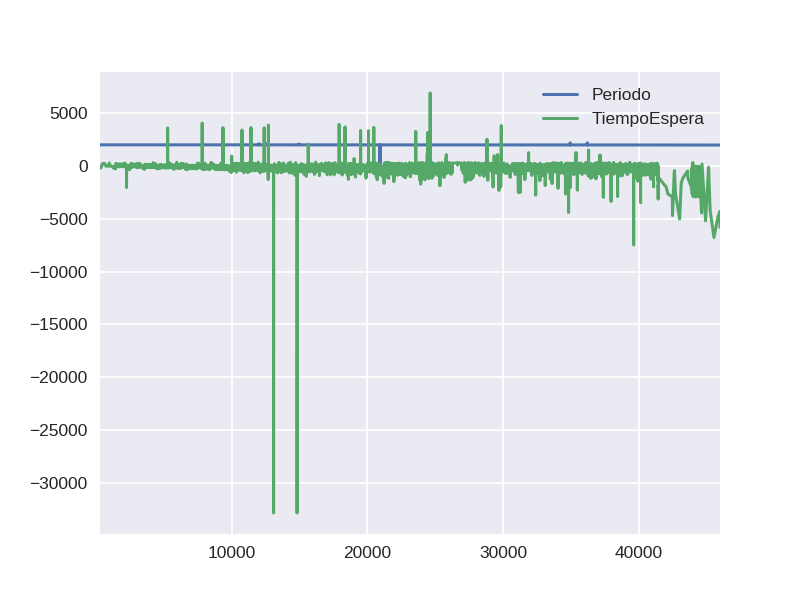

In [13]:
tiempos_espera.plot()

In [16]:
tiempos_espera[tiempos_espera["TiempoEspera"] > 0]

,Periodo,TiempoEspera
496,2014,231.0
503,2014,203.0
556,2014,228.0
559,2014,228.0
652,2014,257.0
1000,2014,302.0
1012,2014,75.0
1013,2014,75.0
1040,2014,54.0
1041,2014,54.0


### ¿Con que esperaste cuánto?
** +6926.000000 !!! **
Esto es un poco ridiculo. Pero este error está atado a la calidad del dato. Lo que podemos hacer es limpiarlo.

In [17]:
tiempos_espera = tiempos_espera[tiempos_espera["Periodo"] < 2015] 
tiempos_espera = tiempos_espera[tiempos_espera["TiempoEspera"] < 0] # Errores, probablemente año 1900? (IDK)
tiempos_espera = tiempos_espera[tiempos_espera["TiempoEspera"] > -10000] # Errores, probablemente año 1900? (IDK)
# print(tiempos_espera.Periodo.unique()) # Ver que años
tiempos_espera = tiempos_espera.set_index("Periodo")

<IPython.core.display.Javascript object>


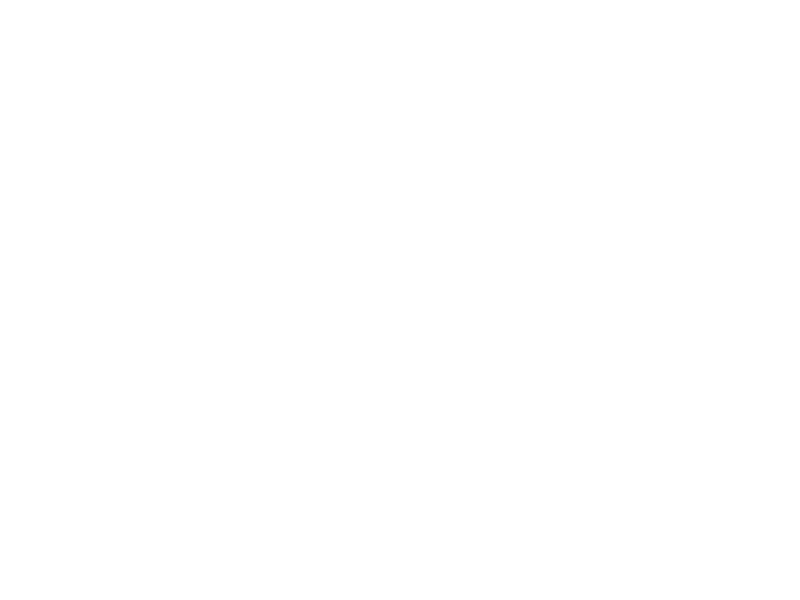

AttributeError: Unknown property type

In [20]:
tiempos_espera.describe()
# tiempos_espera.plot()


In [11]:
# verde_obscuro = seaborn.palplot(seaborn.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

<IPython.core.display.Javascript object>


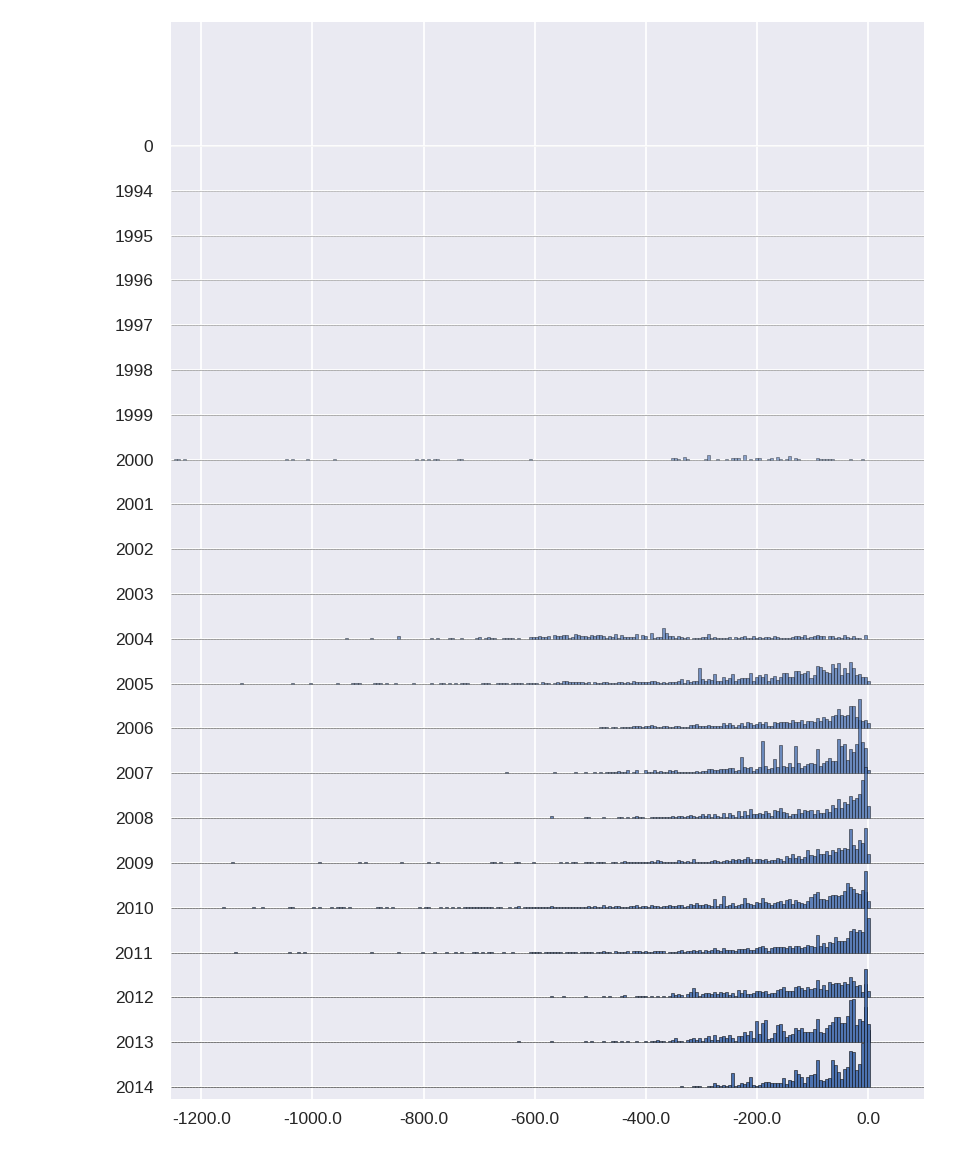

In [22]:
# %matplotlib inline
fig, axes = joypy.joyplot(tiempos_espera, 
                          by="Periodo", 
                          column="TiempoEspera", 
                          fade=True,
                          #kind="normalized_counts",
                          hist=True, 
                          bins=250,
                          grid=True,
                          range_style="own", 
                          x_range=[-1255,100], 
                          figsize=(4,8),
                          colormap=seaborn.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True))

Algunos de los usos mas avanzados de esto te permiten hacer análisis de datos estructurados, como justamente un sistema informatico ya existente usualmente se compone de muchas tablas y relaciones, además de vinculos y estructuras entre ellas. Veamos un ejemplo con otra base de datos.

Usaremos una llamada [Chinook](https://github.com/lerocha/chinook-database), una base de datos de ejemplo que contiene datos de una tienda de discos, es un ejemplo un poco "empresarial" pero puede servirnos. Podemos ver el esquema de la base de datos aqui:
<img src="http://lh4.ggpht.com/_oKo6zFhdD98/SWFPtyfHJFI/AAAAAAAAAMc/GdrlzeBNsZM/s800/ChinookDatabaseSchema1.1.png" alt="db chinook"/>

In [23]:
chinook_connection = sqlite3.connect("Chinook_Sqlite.sqlite")
chinook_dataframe = pd.read_sql("""Select *
FROM Track
LEFT OUTER JOIN MediaType ON MediaType.MediaTypeId = Track.MediaTypeId
LEFT OUTER JOIN Genre ON Genre.GenreId =Track.GenreId
LEFT OUTER JOIN Album ON Album.AlbumId = Track.AlbumId
LEFT OUTER JOIN Artist ON Artist.ArtistId = Album.ArtistId""", chinook_connection)
chinook_dataframe

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,MediaTypeId,Name,GenreId,Name,AlbumId,Title,ArtistId,ArtistId,Name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,1,MPEG audio file,1,Rock,1,For Those About To Rock We Salute You,1,1,AC/DC
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,2,Protected AAC audio file,1,Rock,2,Balls to the Wall,2,2,Accept
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,2,Protected AAC audio file,1,Rock,3,Restless and Wild,2,2,Accept
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,2,Protected AAC audio file,1,Rock,3,Restless and Wild,2,2,Accept
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,2,Protected AAC audio file,1,Rock,3,Restless and Wild,2,2,Accept
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,1,MPEG audio file,1,Rock,1,For Those About To Rock We Salute You,1,1,AC/DC
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,1,MPEG audio file,1,Rock,1,For Those About To Rock We Salute You,1,1,AC/DC
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,1,MPEG audio file,1,Rock,1,For Those About To Rock We Salute You,1,1,AC/DC
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,1,MPEG audio file,1,Rock,1,For Those About To Rock We Salute You,1,1,AC/DC
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,1,MPEG audio file,1,Rock,1,For Those About To Rock We Salute You,1,1,AC/DC


In [ ]:
chinook_connection = sqlite3.connect("Chinook_Sqlite.sqlite")
#artista_genero = pd.read_sql("""Select Genre.Name, Artist.Name
#FROM Track
#LEFT OUTER JOIN Genre ON Genre.GenreId = Track.GenreId
#LEFT OUTER JOIN Track ON Track.AlbumId = Album.AlbumId
#LEFT OUTER JOIN Artist ON Artist.ArtistId = Album.ArtistId """, chinook_connection)
#artista_genero

In [ ]:
chinook_dataframe.to_csv()

Fwomp! necesitamos guardar esto en un archivo.


In [32]:
tiempos_espera.to_excel("miarchivo.xls")

Podemos ver mas de la interoperabilidad de estas plataformas en la [documentación de Pandas y SQL](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) y en general aprender más de SQL en una variedad de recursos en linea.

Ahora probemos a extraer información.

In [2]:
%time centros_educativos = pd.read_excel("14102014 - MINEDUC - CENTROS EDUCATIVOS REPUBLICA DE GUATEMALA.xlsx")

CPU times: user 9.13 s, sys: 42.8 ms, total: 9.18 s
Wall time: 9.19 s


In [3]:
centros_educativos

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN
0,16-14-1255-41,16-001,ALTA VERAPAZ,CHAHAL,COPB ANEXA A EORM,CASERIO EL DESCONSUELO,NaN,WALTER GEOVANY MACZ,CESAREO XOL ICAL,PREPRIMARIA BILINGUE,OFICIAL,RURAL,ABIERTA,BILINGUE,MATUTINA,DIARIO(REGULAR)
1,16-14-1386-45,16-004,ALTA VERAPAZ,CHAHAL,NUCLEO FAMILIAR EDUCATIVO PARA EL DESARROLLO N...,CASERIO SETAL,NaN,JUAN ANTONIO FIGUEROA CAAL,SANTIAGO CHOC CHO,BASICO,OFICIAL,RURAL,ABIERTA,MONOLINGUE,DOBLE,DIARIO(REGULAR)
2,16-14-2143-43,16-014,ALTA VERAPAZ,CHAHAL,EORM,CASERIO XALAJA,NaN,GERMAN PABLO XONA,NaN,PRIMARIA,OFICIAL,RURAL,CERRADA TEMPORALMENTE,BILINGUE,MATUTINA,DIARIO(REGULAR)
3,16-14-9028-43,16-023,ALTA VERAPAZ,CHAHAL,EORM,ALDEA SEMOX SEMAU,NaN,ROLANDO OLIVERIO PINTO CABRERA,NaN,PRIMARIA,OFICIAL,RURAL,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,DIARIO(REGULAR)
4,16-14-9030-43,16-023,ALTA VERAPAZ,CHAHAL,EORM,CASERIO EL ESFUERZO,NaN,ROLANDO OLIVERIO PINTO CABRERA,NaN,PRIMARIA,OFICIAL,RURAL,CERRADA TEMPORALMENTE,MONOLINGUE,MATUTINA,DIARIO(REGULAR)
5,16-14-0053-45,16-026,ALTA VERAPAZ,CHAHAL,INEB DE TELESECUNDARIA,ALDEA LAS CONCHAS,NaN,ROBERTO CHUN TIUL,ABELARDO CHOC COC,BASICO,OFICIAL,RURAL,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR)
6,16-14-0001-45,16-027,ALTA VERAPAZ,CHAHAL,INSTITUTO NACIONAL DE EDUCACION BASICA DE TELE...,CASERIO SAN JOSE,40483348,EDGAR MANFREDO SANDOVAL,ALBERTO YAT MEZ,BASICO,OFICIAL,RURAL,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR)
7,16-14-0002-42,16-027,ALTA VERAPAZ,CHAHAL,EODP COMUNIDAD SEPAC,COMUNIDAD SEPAC,NaN,EDGAR MANFREDO SANDOVAL,GUILLERMO CAC AYÚ,PARVULOS,OFICIAL,RURAL,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR)
8,16-14-0003-42,16-027,ALTA VERAPAZ,CHAHAL,EODP CASERIO SETUTZ,CASERIO SETUTZ,NaN,EDGAR MANFREDO SANDOVAL,ENRIQUE ROLANDO COC POP,PARVULOS,OFICIAL,RURAL,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR)
9,16-14-0004-43,16-027,ALTA VERAPAZ,CHAHAL,EORM COMUNIDAD SANTO DOMINGO,COMUNIDAD SANTO DOMINGO,NaN,EDGAR MANFREDO SANDOVAL,MANUÉL ENRIQUE CANTI CHOC,PRIMARIA,OFICIAL,RURAL,ABIERTA,BILINGUE,MATUTINA,DIARIO(REGULAR)


In [4]:
# print(centros_educativos["AREA"].value_counts())
centros_educativos = centros_educativos[centros_educativos.AREA != "SIN ESPECIFICAR"]
print(centros_educativos["AREA"].value_counts())

RURAL     36747
URBANA    17632
Name: AREA, dtype: int64


In [5]:
for col in ["DISTRITO", "DEPARTAMENTO", "MUNICIPIO", "NIVEL","SECTOR","AREA","STATUS","MODALIDAD","JORNADA","PLAN"]:
            centros_educativos[col] = centros_educativos[col].astype('category')

/home/tian/utz/notebooks_dateros/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
#centros_educativos.groupby(["JORNADA","PLAN","AREA"],).count()
centros_educativos.groupby(["JORNADA","PLAN","AREA"]).count()["CODIGO"]

JORNADA     PLAN             AREA  
DOBLE       A DISTANCIA      RURAL        1.0
                             URBANA      45.0
            DIARIO(REGULAR)  RURAL      703.0
                             URBANA     563.0
            DOMINICAL        RURAL       23.0
                             URBANA      31.0
            FIN DE SEMANA    RURAL      325.0
                             URBANA    2242.0
            IRREGULAR        RURAL        1.0
                             URBANA       6.0
            MIXTO            RURAL        NaN
                             URBANA       NaN
            SABATINO         RURAL        6.0
                             URBANA      85.0
INTERMEDIA  A DISTANCIA      RURAL        NaN
                             URBANA       3.0
            DIARIO(REGULAR)  RURAL       21.0
                             URBANA     108.0
            DOMINICAL        RURAL        1.0
                             URBANA       NaN
            FIN DE SEMANA    RURAL        1.

In [76]:
centros_educativos_limitado = centros_educativos[["CODIGO", "PLAN", "AREA", "JORNADA", "NIVEL"]]
centros_educativos_limitado = centros_educativos_limitado[
                                centros_educativos_limitado["JORNADA"].isin(
                                    ["MATUTINA", "MIXTO", "VESPERTINA", "DOBLE"])]
centros_educativos_limitado = centros_educativos_limitado[
                                centros_educativos_limitado["NIVEL"].isin(
                                    ["PREPRIMARIA", "PREPRIMARIA BILINGUE", "PRIMARIA", "BASICO", "PARVULOS", "DIVERSIFICADO"])]
centros_educativos_limitado = centros_educativos_limitado[
                                centros_educativos_limitado["PLAN"].isin(
                                    ["DIARIO(REGULAR)", "FIN DE SEMANA"])]
centros_educativos_limitado["JORNADA"] = centros_educativos_limitado["JORNADA"].cat.remove_unused_categories()
centros_educativos_limitado["PLAN"] = centros_educativos_limitado["PLAN"].cat.remove_unused_categories()
centros_educativos_limitado["NIVEL"] = centros_educativos_limitado["NIVEL"].cat.remove_unused_categories()

# centros_educativos_limitado["JORNADA"]

In [84]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>


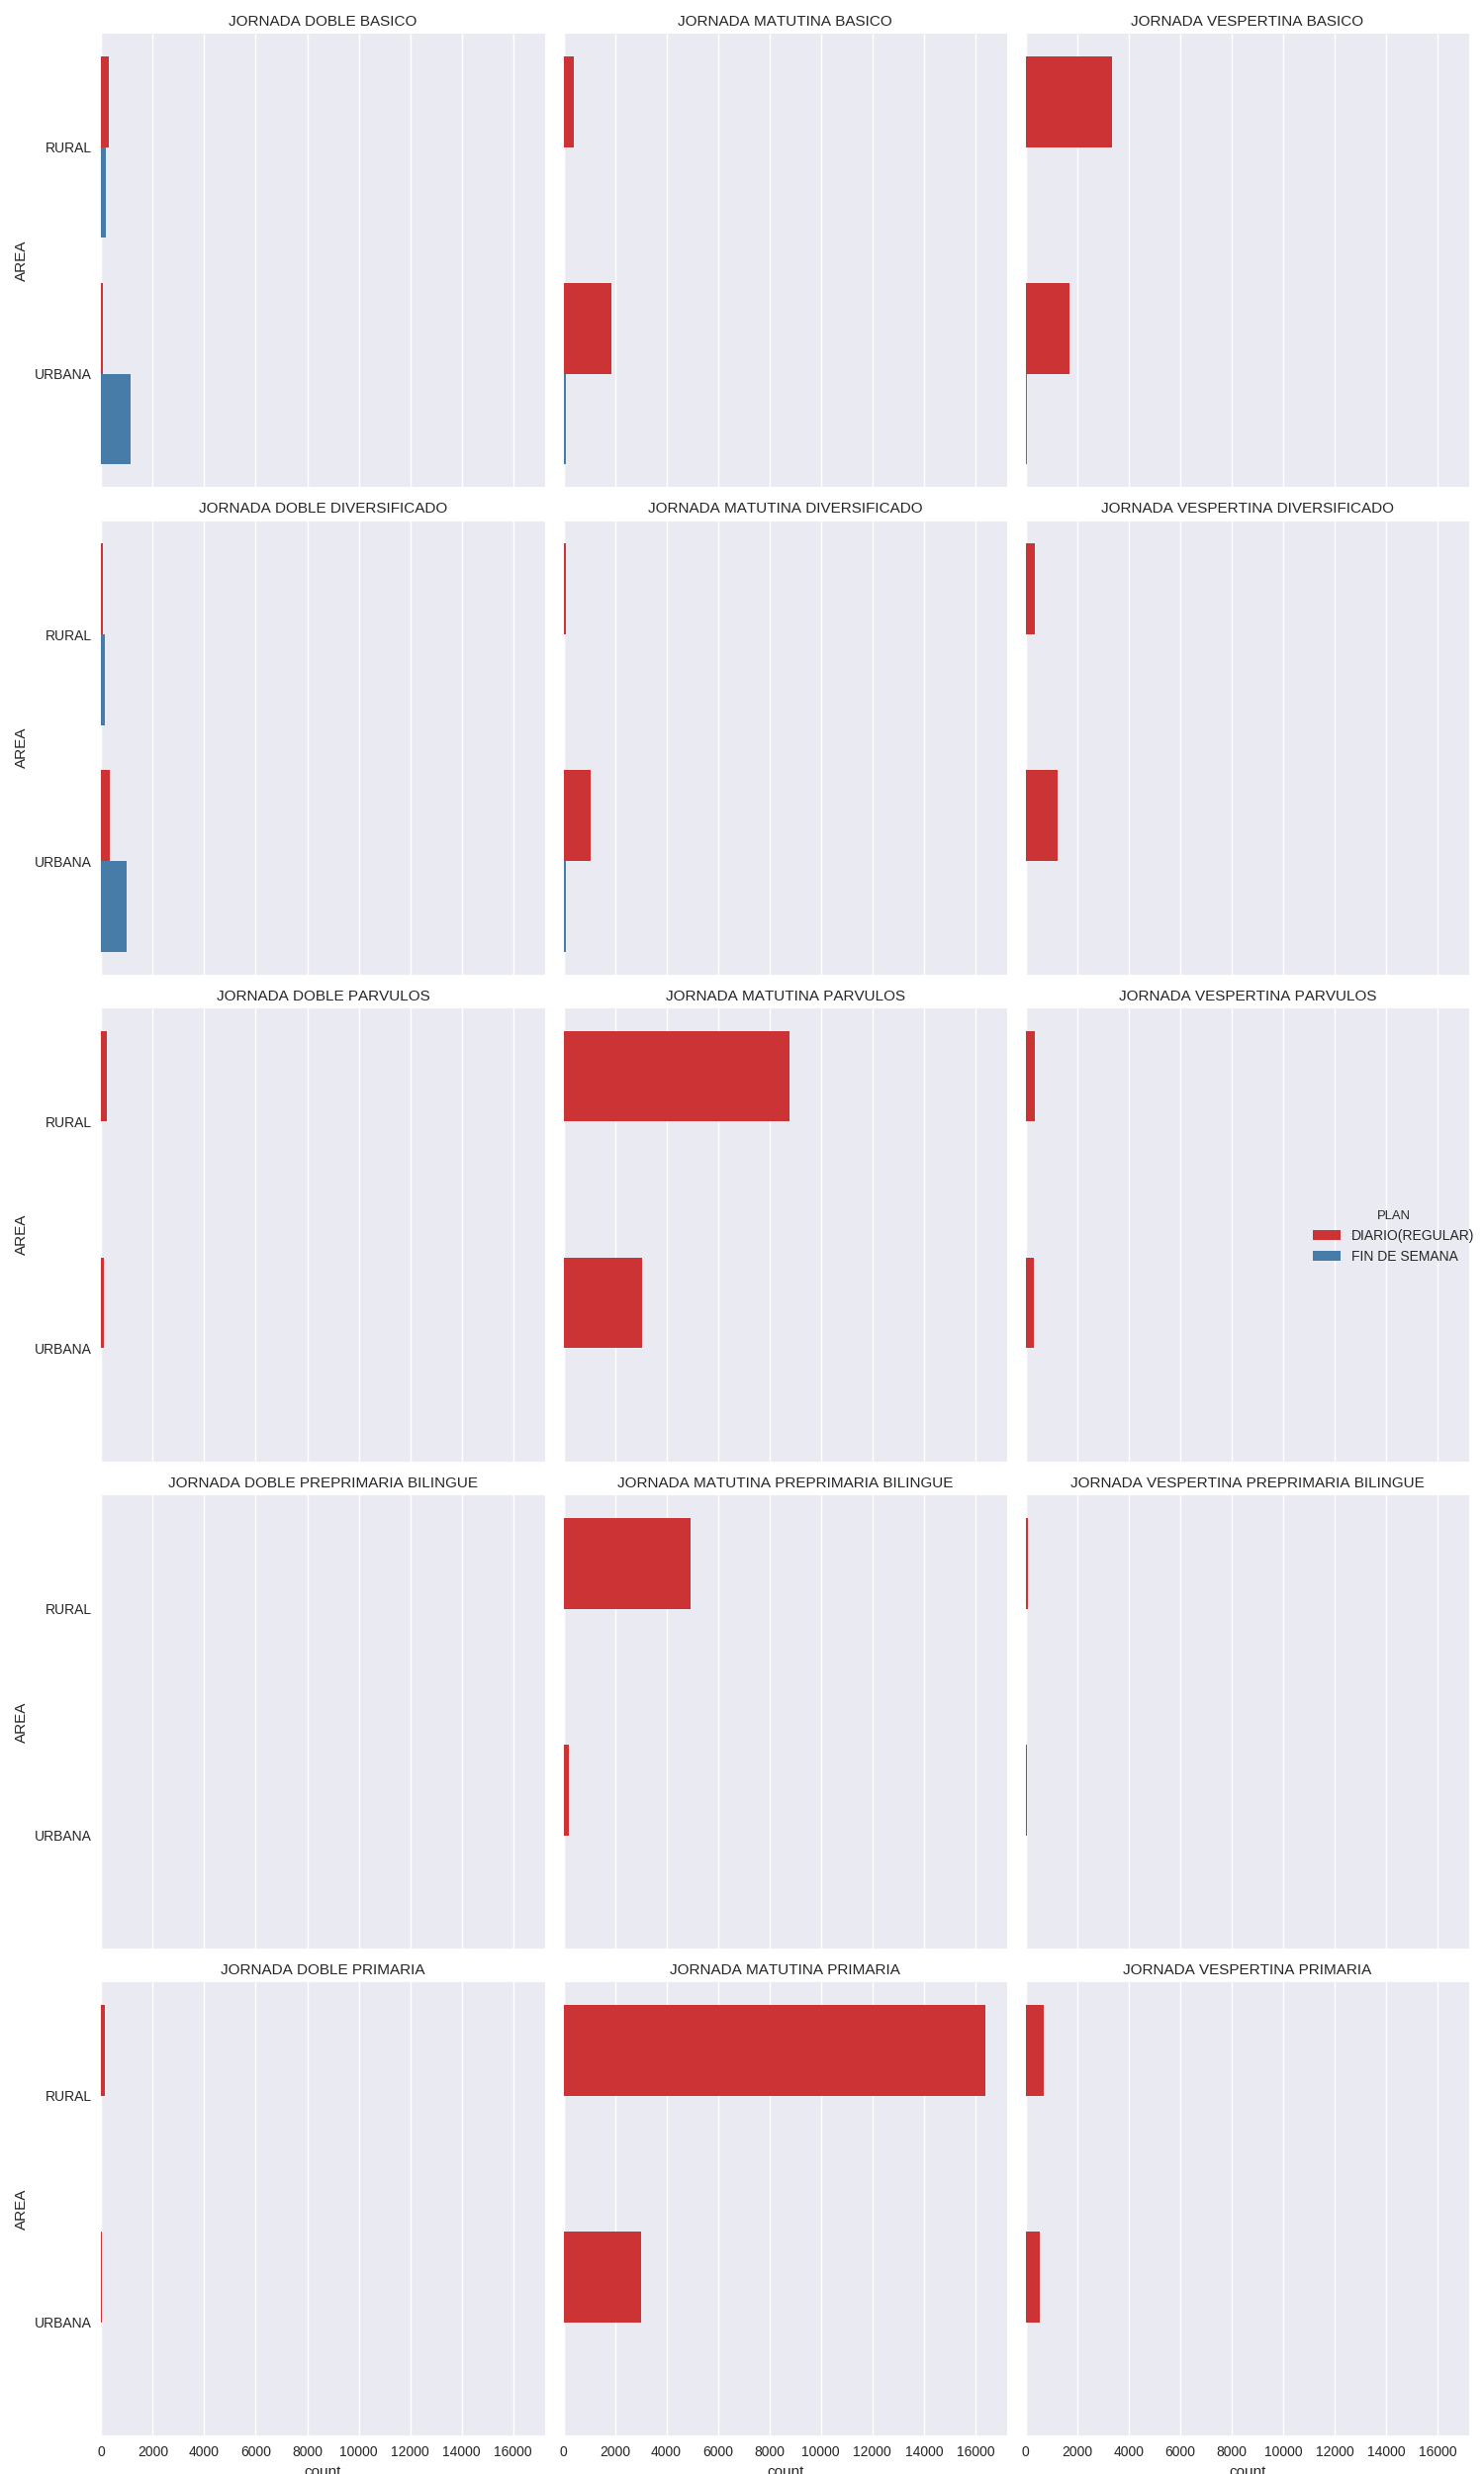

In [92]:
centros_plot = seaborn.factorplot(
    y="AREA", 
    col="JORNADA", 
    hue="PLAN", 
    row="NIVEL", 
    data=centros_educativos_limitado, 
    kind="count",    
    orient='h',
    size=5, 
    palette="Set1").set_titles("{col_var} {col_name} {row_name}").despine(top=True)
#seaborn.tsplot(centros_educativos.groupby(["JORNADA","PLAN","AREA"]).count()["CODIGO"])
matplotlib.pyplot.show(centros_plot)

In [94]:
print(centros_educativos_limitado["AREA"].value_counts())

RURAL     36573
URBANA    16029
Name: AREA, dtype: int64


In [8]:
# escuelas_heatmap_pivot = centros_educativos.pivot("PLAN", "AREA", "JORNADA")

In [80]:
escuelas_heatmap = centros_educativos.pivot_table("PLAN", "AREA", "JORNADA", aggfunc=len)
#escuelas_heatmap
# Draw a heatmap with the numeric values in each cell
# f, ax = matplotlib.subplots(figsize=(9, 6))
heat_escuelas = seaborn.heatmap(escuelas_heatmap, annot=True, fmt="d", linewidths=.5)
# y="PLAN", col="AREA", hue="JORNADA", row="NIVEL")
matplotlib.pyplot.show(heat_escuelas)

# Conclusiones

Con esta gráfica al final podemos ver claramente como con tan solo contar, podemos obtener información categórica hasta y contar una historia con los datos. Podemos ver como en general la cobertura pública rural de educación varía y los planes de fin de semana o las tardes se vuelven mas accesibles.

